In [0]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles

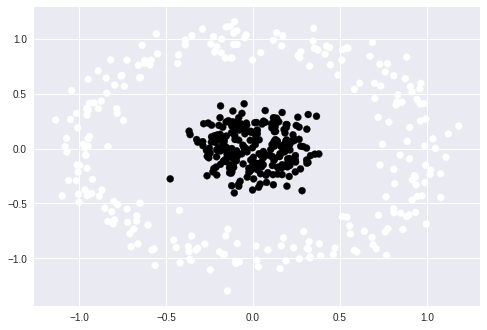

(500,) (500, 2)


In [0]:
X,y = make_circles(n_samples=500, shuffle=True, noise=0.1, random_state=1, factor=0.2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# y into categorical data
from keras.utils import to_categorical
y_oht = to_categorical(y)
print(y.shape,y_oht.shape)

In [0]:
# Model

def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

class NeuralNetwork:
    def __init__(self,input_size,h1,h2,output_size):
        model = {}
        model["W1"] = np.random.randn(input_size,h1)
        model["b1"] = np.zeros((1,h1))

        model["W2"] = np.random.randn(h1,h2)
        model["b2"] = np.zeros((1,h2))

        model["W3"] = np.random.randn(h2,output_size)
        model["b3"] = np.zeros((1,output_size))

        self.model = model

    def forward(self,X):
        model = self.model
        W1,W2,W3 = model["W1"],model["W2"],model["W3"]
        b1,b2,b3 = model["b1"],model["b2"],model["b3"]

        # First Layer
        z1 = np.dot(X,W1) + b1
        a1 = np.tanh(z1)

        #Second Layer
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        #Third Layer
        z3 = np.dot(a2,W3) + b3
        a3 = softmax(z3) 


        self.activation_outputs = (a1,a2,a3)
        return a3

    def backward(self,X,y,learning_rate):

        m = X.shape[0]
        model = self.model
        (a1,a2,a3) = self.activation_outputs 
        W1,W2,W3 = model["W1"],model["W2"],model["W3"]
        b1,b2,b3 = model["b1"],model["b2"],model["b3"]
        
        # Delta3,dw3,db3
        delta3 = a3 - y #for cross entropy, softmax activation
        dw3 = np.dot(a2.T,delta3) # (h2Xm,mXc) = (h2Xc) = W3.shape
        db3 = np.sum(delta3,axis=0)

        # Delta2, dw2, db2
        delta2 = np.dot(delta3,W3.T)*(1-np.square(a2))
        dw2 = np.dot(a1.T,delta2) # (h1Xm,mXh2) = (h1Xh2) = W2.shape
        db2 = np.sum(delta2,axis=0)

        # Delta1, dw1, db1
        delta1 = np.dot(delta2,W2.T)*(1-np.square(a1))
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)

        #Gradient Descent
        self.model["W1"] -= learning_rate*dw1
        self.model["W2"] -= learning_rate*dw2
        self.model["W3"] -= learning_rate*dw3

        self.model["b1"] -= learning_rate*db1
        self.model["b2"] -= learning_rate*db2
        self.model["b3"] -= learning_rate*db3

    def predict(self,X):
        y_pred = self.forward(X)
        return np.argmax(y_pred,axis=1)


    def loss(self,y_oht,pred):
        return -1*np.mean(y_oht*np.log(pred))

    def train(self,X,y,learning_rate,epochs):

        losses = []
        for i in range(epochs):
            preds = self.forward(X)
            l = self.loss(y,preds)
            losses.append(l)
            self.backward(X,y,learning_rate)

        
        return losses        

In [0]:
net = NeuralNetwork(2,4,3,2)
losses = net.train(X,y_oht,0.001,500)

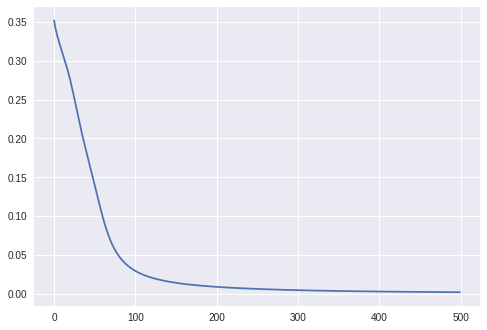

In [0]:
plt.plot(losses)
plt.show()

In [0]:
pred = net.predict(X)

print(pred.shape)

(500,)


In [0]:
np.sum(pred==y)

500

In [0]:
!ls

__pycache__  sample_data  visualize.py


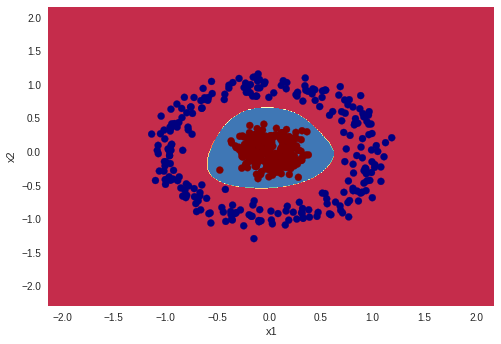

In [0]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:net.predict(x),X,y)